# `matplotlib` twinx vs secondary axis

## Imports

In [1]:
from datetime import timedelta

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from matplotlib import font_manager

# Add system fonts so matplotlib sees them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

In [3]:
# DEV
from datetime import date

metadata_dict = {
    "Title": "Twitter/X Matplotlib tutorial",
    "Author": "Pawel Jastrzebski (pawjast)",
    "Description": "https://medium.com/@pawjast https://twitter.com/pawjast https://github.com/pawjast www.linkedin.com/in/pawjast https://www.youtube.com/@pawjast https://pawjast.substack.com/",
    "Creation Time": f"{date.today():%d %B %Y}",
    "Source": "https://twitter.com/pawjast"
}

## Data 1

In [4]:
df = pd.read_csv(
    f"../data/last_christmas_vs_births_in_UK.csv",
    parse_dates=["Date"],
    dayfirst=True,
    index_col=["Date"],
)

df

,Google Trends: Last Christmas by Wham! (United Kingdom),Live births in the UK and Wales
Date,,
2008-06-01,1,58491
2008-07-01,0,61811
2008-08-01,1,60407
2008-09-01,2,60229
2008-10-01,2,59749
2008-11-01,10,57201
2008-12-01,42,58591
2009-01-01,1,57361
2009-02-01,2,53033


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2008-06-01 to 2011-06-01
Data columns (total 2 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   Google Trends: Last Christmas by Wham! (United Kingdom)  37 non-null     int64
 1   Live births in the UK and Wales                          37 non-null     int64
dtypes: int64(2)
memory usage: 888.0 bytes


## Settings

In [6]:
plt.rcParams.update(
    {
        "font.family": "Roboto",
        "font.size": 22,
        "hatch.linewidth": 1.75,
    }
)

# colours
col1 = "orange"
col2 = "purple"
col3 = "blue"

## Twinx plot

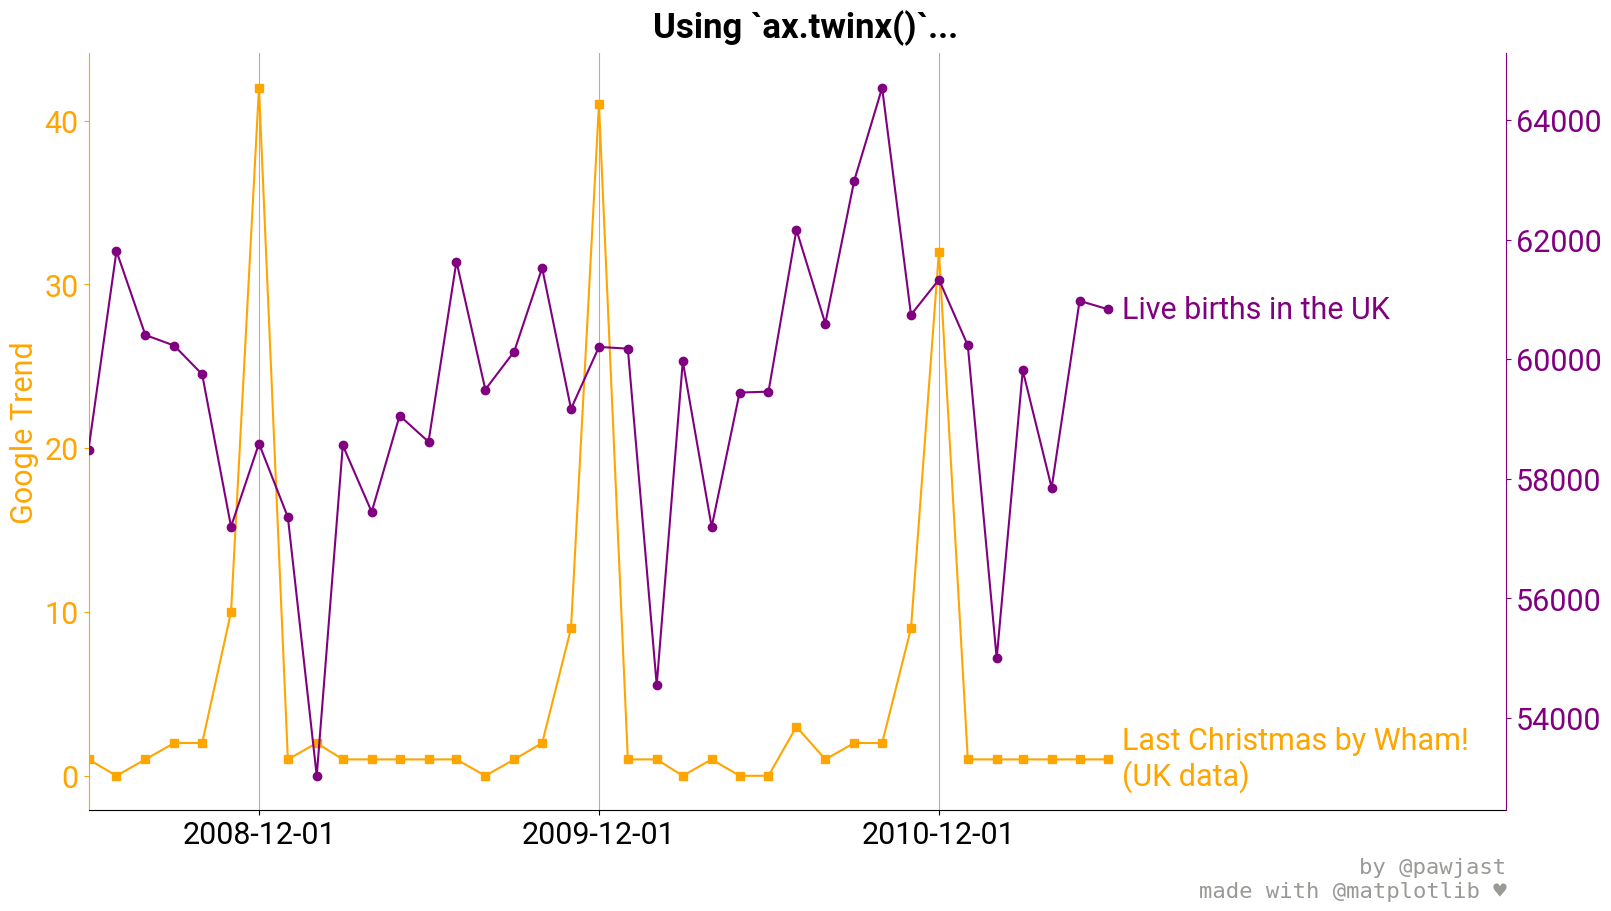

In [7]:
fig, ax = plt.subplots(
    figsize=(16,9),
    facecolor="white",
    layout="constrained"
)
fig.suptitle(
    "Using `ax.twinx()`...",
    fontsize=25,
    weight="bold"
)

ax.plot(
    df.index,
    df["Google Trends: Last Christmas by Wham! (United Kingdom)"],
    marker="s",
    color=col1
)

ax2 = ax.twinx()
ax2.plot(
    df.index,
    df["Live births in the UK and Wales"],
    marker="o",
    color=col2
)

# `ax` settings
ax.set_ylabel(
    "Google Trend",
    color=col1
)
ax.set_xticks(
    df.index.values[[6, 18, 30]]
)
ax.set_xlim(
    date(2008, 6, 1),
    date(2012, 8, 1),
)
ax.grid(
    axis="x"
)
ax.tick_params(
    axis="y",
    colors=col1
)
ax.spines["left"].set_color(col1)
for position in ["top", "right"]:
    ax.spines[position].set_visible(False)

ax.text(
    x=df.index[-1] + timedelta(days=15),
    y=df["Google Trends: Last Christmas by Wham! (United Kingdom)"].iloc[-1],
    s="Last Christmas by Wham!\n(UK data)",
    va="center",
    color=col1
)

# `ax2` settings
for position in ["left", "top", "bottom"]:
    ax2.spines[position].set_visible(False)

ax2.tick_params(
    axis="y",
    colors=col2
)
ax2.spines["right"].set_color(col2)
ax2.text(
    x=df.index[-1] + timedelta(days=15),
    y=df["Live births in the UK and Wales"].iloc[-1],
    s="Live births in the UK",
    va="center",
    color=col2
)


# Footer
ax.text(
    1, -0.12,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
);

# plt.savefig(
#     fname="pawjast.png",
#     format="png",
#     dpi=125,
#     metadata=metadata_dict
# );

## Data 2

In [8]:
rivers = pd.Series(
    {
        "Nile": 6650,
        "Amazon": 6400,
        "Yangtze": 6300,
        "Yellow": 5464,
        "Parana": 4880,
        "Congo": 4700
    }
)

rivers

Nile       6650
Amazon     6400
Yangtze    6300
Yellow     5464
Parana     4880
Congo      4700
dtype: int64

## Secondary axis

In [9]:
def km2mile(x: int|float) -> float:
    return x*0.62

In [10]:
def mile2km(x: int|float) -> float:
    return x*1.6

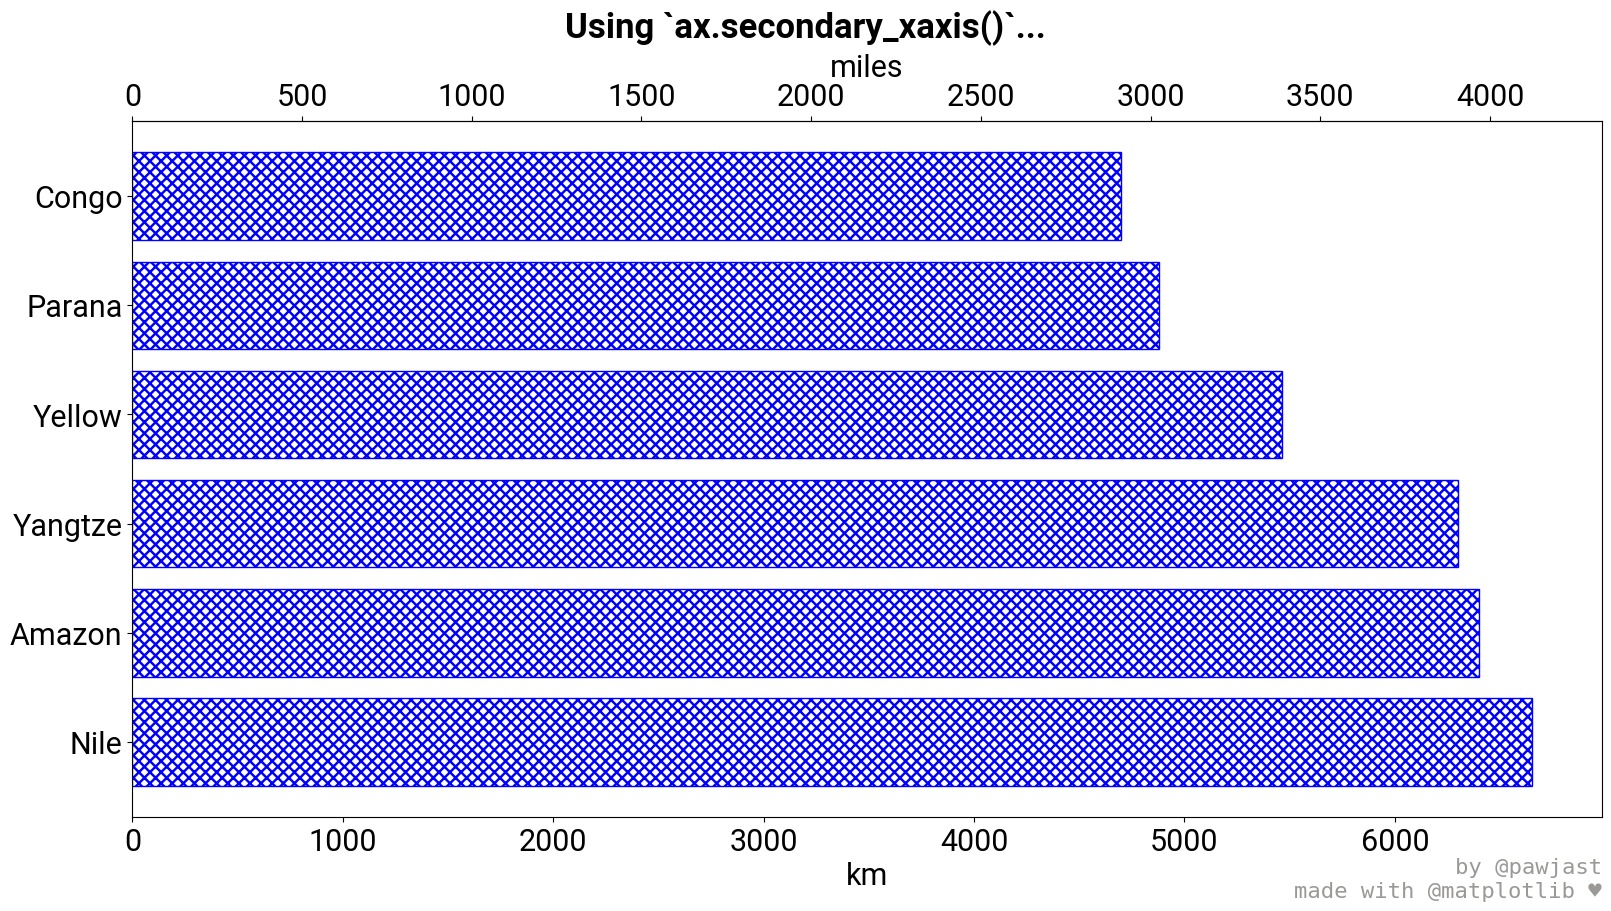

In [11]:
fig, ax = plt.subplots(
    figsize=(16,9),
    facecolor="white",
    layout="constrained"
)
fig.suptitle(
    "Using `ax.secondary_xaxis()`...",
    fontsize=25,
    weight="bold"
)

ax.barh(
    rivers.index,
    rivers,
    color="white",
    edgecolor=col3,
    hatch="xxx"
)
ax.set_xlabel("km")

sec_ax = ax.secondary_xaxis(
    location="top",
    functions=(
        km2mile,
        mile2km
    )
)
sec_ax.set_xlabel("miles")

# Footer
ax.text(
    1, -0.12,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
);

# plt.savefig(
#     fname="pawjast2.png",
#     format="png",
#     dpi=125,
#     metadata=metadata_dict
# );